In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint, solve_ivp
from scipy.interpolate import CubicSpline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
a = os.listdir()
datasets_2 = []
int_list = []

for i in a:
    if ".npz" in i:
        temp = i.split("_")[1]
        if temp == "3":
            datasets_2.append(i)
    elif ".txt" in i:
        temp = i.split("_")[0]
        if temp == "Initial":
            int_list.append(np.loadtxt(i))

In [3]:
datasets_2

['HMI_3_fl.npz', 'HMS_3_fl.npz']

In [4]:
model_dict = {}

for i in datasets_2:
    n_d = i.split("_")[0]
    
    if n_d not in model_dict.keys():
        model_dict[n_d] = []
        z = np.load(i)["Extrapolation"]
        model_dict[n_d].append(z)
    
    else:
        z = np.load(i)["Extrapolation"]
        model_dict[n_d].append(z)
        
for i in model_dict.keys():
    temp_a = np.array(model_dict[i])
    
    n_d, n_s, n_p = np.shape(temp_a)
    
    for r in range(n_d):
        for c in range(n_s):
            for k in range(n_p):
                if temp_a[r,c,k] < 0:
                    temp_a[r,c,k] = 0
    
    mean = np.mean(temp_a, axis = 0)
    model_dict[i] = mean

In [5]:
a = np.array(int_list)

Cg_min = np.min(a[:,:,2])
Cc_min = np.min(a[:,:,-1])

Cg_max = np.max(a[:,:,2])
Cc_max = np.max(a[:,:,-1])

In [6]:
x_min = (30/50)*(Cc_min - 5)
x_max = (30/50)*(Cc_max - 5)

y_min = (30/80)*(Cg_min - 20)
y_max = (30/80)*(Cg_max - 20)

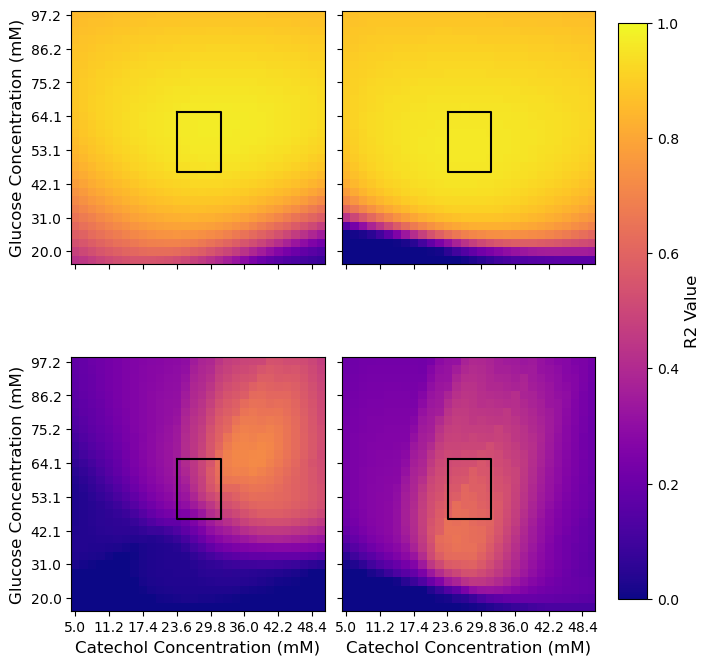

In [7]:
cmap = "plasma"
vmin = 0
vmax = 1
keys = list(model_dict.keys())


Cg_range = np.linspace(20, 100, 30)
Cc_range = np.linspace(5, 50, 30)

Xv_const = 0.01


# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7), constrained_layout=True, sharex = True, sharey = True)


for z in range(len(keys)):
    
    data1 =  np.flipud(model_dict[keys[z]][0].reshape(30,30))
    data2 =  np.flipud(model_dict[keys[z]][1].reshape(30,30))

    # Create heatmaps
    im1 = axes[z,0].imshow(data1, cmap= cmap, vmin=vmin, vmax=vmax)
    x_label = []
    for i in Cc_range[::4]:
        x_label.append(round(i,1))
    y_label = []
    for i in np.flipud(Cg_range[::4]):
        y_label.append(round(i,1))
    axes[z,0].set_xticks(ticks = np.arange(30)[::4], labels = x_label)
    axes[z,0].set_yticks(ticks = np.arange(30)[::4], labels = y_label)
    if z == 1:
        axes[z,0].set_xlabel("Catechol Concentration (mM)", fontsize = 12)
    axes[z,0].set_ylabel("Glucose Concentration (mM)", fontsize = 12)
    axes[z,0].plot([x_min, x_max, x_max, x_min, x_min],[y_min, y_min, y_max, y_max, y_min ],"k")

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    im2 = axes[z,1].imshow(data2, cmap= cmap, vmin=vmin, vmax=vmax)
    x_label = []
    for i in Cc_range[::4]:
        x_label.append(round(i,1))
    y_label = []
    for i in np.flipud(Cg_range[::4]):
        y_label.append(round(i,1))
    axes[z,1].set_xticks(ticks = np.arange(30)[::4], labels = x_label)
    axes[z,1].set_yticks(ticks = np.arange(30)[::4], labels = y_label)
    if z == 1:
        axes[z,1].set_xlabel("Catechol Concentration (mM)", fontsize = 12)
    axes[z,1].plot([x_min, x_max, x_max, x_min, x_min],[y_min, y_min, y_max, y_max, y_min ],"k")


    # Add a common color bar
imz = im2
cbar = fig.colorbar(imz, ax=axes, orientation='vertical', fraction=0.055, pad=0.04)
cbar.set_label('R2 Value', fontsize = 12)

In [8]:
keys

['HMI', 'HMS']

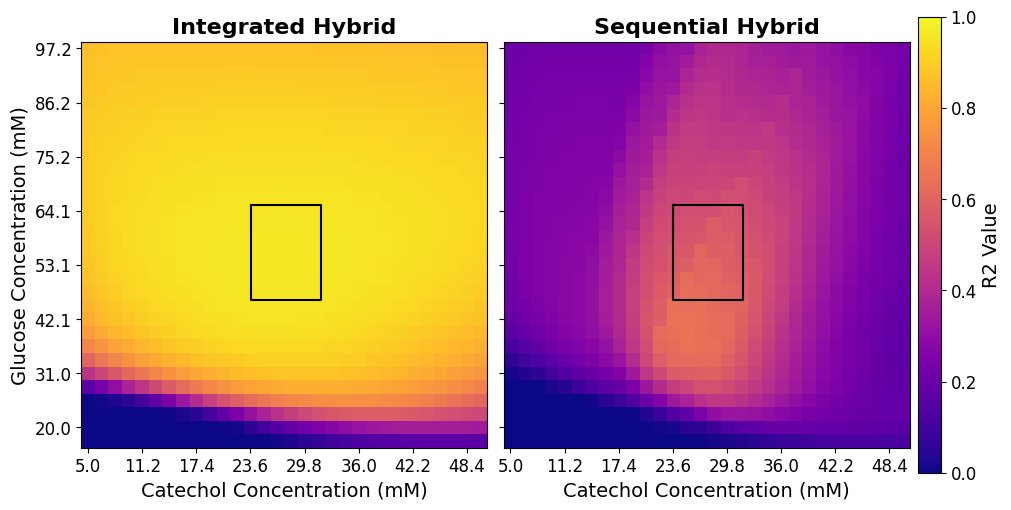

In [11]:
cmap = "plasma"
vmin = 0
vmax = 1
keys = list(model_dict.keys())
names = {"HMI" : "Integrated Hybrid", "HMS" : "Sequential Hybrid"}

Cg_range = np.linspace(20, 100, 30)
Cc_range = np.linspace(5, 50, 30)

Xv_const = 0.01


# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True, sharex = True, sharey = True)


for z in range(len(keys)):
    
    data1 =  np.flipud(model_dict[keys[z]][1].reshape(30,30))

    # Create heatmaps
    im1 = axes[z].imshow(data1, cmap= cmap, vmin=vmin, vmax=vmax)
    x_label = []
    for i in Cc_range[::4]:
        x_label.append(round(i,1))
    y_label = []
    for i in np.flipud(Cg_range[::4]):
        y_label.append(round(i,1))
    axes[z].set_xticks(ticks = np.arange(30)[::4], labels = x_label, fontsize = 12)
    axes[z].set_yticks(ticks = np.arange(30)[::4], labels = y_label, fontsize = 12)
    axes[z].set_xlabel("Catechol Concentration (mM)", fontsize = 14)
    if z == 0:
        axes[z].set_ylabel("Glucose Concentration (mM)", fontsize = 14)
    axes[z].set_title(names[keys[z]], fontweight = "bold", fontsize = 16)
    axes[z].plot([x_min, x_max, x_max, x_min, x_min],[y_min, y_min, y_max, y_max, y_min ],"k")


    # Add a common color bar
imz = im2
cbar = fig.colorbar(imz, ax=axes, orientation='vertical', fraction=0.05, pad=0.01)
cbar.set_label('R2 Value', fontsize = 14)
cbar.ax.tick_params(labelsize = 12)
plt.savefig("Int_v_Seq.svg")